In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob

In [ ]:
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# print(all_filenames)

# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [3]:
stu_data = pd.read_csv('combined_csv.csv')
stu_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,some college,free/reduced,completed,65,62,61
1,male,group D,bachelor's degree,standard,none,61,59,54
2,male,group A,some high school,standard,none,57,50,50
3,male,group C,bachelor's degree,free/reduced,none,63,64,56
4,female,group B,associate's degree,free/reduced,completed,57,87,82


In [4]:
stu_data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [109]:
stu_data['composite score'] = ((stu_data['math score'] + stu_data['reading score'] + stu_data['writing score'])/3).round()
stu_data['composite score'] = stu_data['composite score'].astype(int)

boys = stu_data.loc[stu_data['gender'] == 'male']
girls = stu_data.loc[stu_data['gender'] == 'female']

std_lunch = stu_data.loc[stu_data['lunch'] == 'standard']
rdc_lunch = stu_data.loc[stu_data['lunch'] == 'free/reduced']

prep_yes = stu_data.loc[stu_data['test preparation course'] == 'completed']
prep_no = stu_data.loc[stu_data['test preparation course'] == 'none']

group_a = stu_data.loc[stu_data['race/ethnicity'] == 'group A']
group_b = stu_data.loc[stu_data['race/ethnicity'] == 'group B']
group_c = stu_data.loc[stu_data['race/ethnicity'] == 'group C']
group_d = stu_data.loc[stu_data['race/ethnicity'] == 'group D']
group_e = stu_data.loc[stu_data['race/ethnicity'] == 'group E']

p_shs = stu_data.loc[stu_data['parental level of education'] == 'some high school']
p_hs = stu_data.loc[stu_data['parental level of education'] == 'high school']
p_sc = stu_data.loc[stu_data['parental level of education'] == 'some college']
p_a = stu_data.loc[stu_data['parental level of education'] == "associate's degree"]
p_b = stu_data.loc[stu_data['parental level of education'] == "bachelor's degree"]
p_m = stu_data.loc[stu_data['parental level of education'] == "master's degree"]

passing = stu_data.loc[stu_data['composite score'] > 76]
at_risk = stu_data.loc[(stu_data['composite score'] > 65)  & (stu_data['composite score'] < 76)]
failing = stu_data.loc[stu_data['composite score'] < 65]
excelling = stu_data.loc[stu_data['composite score'] > 89]


In [7]:
stu_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,composite score
0,male,group B,some college,free/reduced,completed,65,62,61,63
1,male,group D,bachelor's degree,standard,none,61,59,54,58
2,male,group A,some high school,standard,none,57,50,50,52
3,male,group C,bachelor's degree,free/reduced,none,63,64,56,61
4,female,group B,associate's degree,free/reduced,completed,57,87,82,75
...,...,...,...,...,...,...,...,...,...
4995,female,group E,master's degree,standard,completed,88,99,95,94
4996,male,group C,high school,free/reduced,none,62,55,55,57
4997,female,group C,high school,free/reduced,completed,59,71,65,65
4998,female,group D,some college,standard,completed,68,78,77,74


Text(0, 0.5, 'Number of Students in each category')

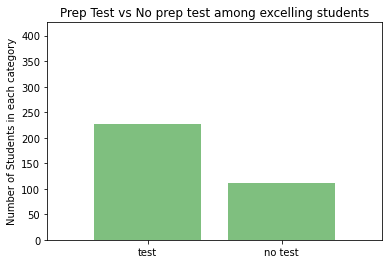

In [20]:
labels = ['test', 'no test']
test_excelling = excelling.loc[excelling['test preparation course'] == 'completed'].count()
no_test_excelling = excelling.loc[excelling['test preparation course'] == 'none'].count()
test_count = [test_excelling['test preparation course'], no_test_excelling['test preparation course']]

x_axis = np.arange(len(test_count))
plt.bar(x_axis, test_count, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(test_count)+200)
plt.title("Prep Test vs No prep test among excelling students")
plt.ylabel("Number of Students in each category")

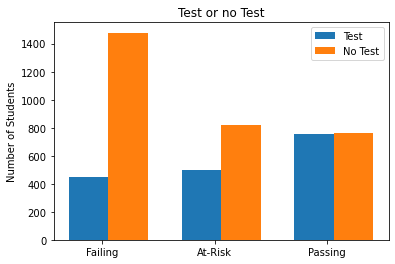

In [22]:
test_failing = failing.loc[failing['test preparation course'] == 'completed'].count()
no_test_failing = failing.loc[failing['test preparation course'] == 'none'].count()
test_at_risk = at_risk.loc[at_risk['test preparation course'] == 'completed'].count()
no_test_at_risk = at_risk.loc[at_risk['test preparation course'] == 'none'].count()
test_passing = passing.loc[passing['test preparation course'] == 'completed'].count()
no_test_passing = passing.loc[passing['test preparation course'] == 'none'].count()

N = 3
test = (test_failing['test preparation course'], test_at_risk['test preparation course'], test_passing['test preparation course'])
no_test = (no_test_failing['test preparation course'], no_test_at_risk['test preparation course'], no_test_passing['test preparation course'])

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, test, width, label='Test')
plt.bar(ind + width, no_test, width, label='No Test')

plt.ylabel('Number of Students')
plt.title('Test or no Test')

plt.xticks(ind + width / 3, ('Failing','At-Risk','Passing'))
plt.legend(loc='best')
plt.show()

# print(test)
# print(no_test)

In [42]:
boys_failing = boys.loc[boys['composite score'] < 65]
boys_at_risk = boys.loc[(boys['composite score'] > 65)  & (boys['composite score'] < 76)]
boys_passing = boys.loc[boys['composite score'] > 76]
girls_failing = girls.loc[girls['composite score'] < 65]
girls_at_risk = girls.loc[(girls['composite score'] > 65)  & (girls['composite score'] < 76)]
girls_passing = girls.loc[girls['composite score'] > 76]

boys_test_failing = boys_failing.loc[boys_failing['test preparation course'] == 'completed'].count()
boys_test_at_risk = boys_at_risk.loc[boys_at_risk['test preparation course'] == 'completed'].count() 
boys_test_passing = boys_passing.loc[boys_passing['test preparation course'] == 'completed'].count()
boys_no_test_failing = boys_failing.loc[boys_failing['test preparation course'] == 'none'].count()
boys_no_test_at_risk = boys_at_risk.loc[boys_at_risk['test preparation course'] == 'none'].count()
boys_no_test_passing = boys_passing.loc[boys_passing['test preparation course'] == 'none'].count()
girls_test_failing = girls_failing.loc[girls_failing['test preparation course'] == 'completed'].count()
girls_test_at_risk = girls_at_risk.loc[girls_at_risk['test preparation course'] == 'completed'].count()
girls_test_passing = girls_passing.loc[girls_passing['test preparation course'] == 'completed'].count()
girls_no_test_failing = girls_failing.loc[girls_failing['test preparation course'] == 'none'].count()
girls_no_test_at_risk = girls_at_risk.loc[girls_at_risk['test preparation course'] == 'none'].count()
girls_no_test_passing = girls_passing.loc[girls_passing['test preparation course'] == 'none'].count()


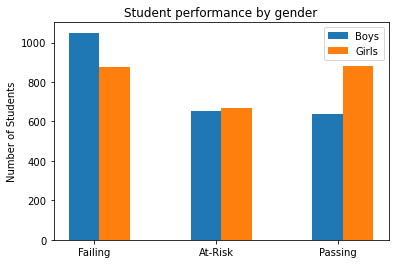

In [57]:
boys_perf = (boys_failing['test preparation course'].count(), boys_at_risk['test preparation course'].count(), boys_passing['test preparation course'].count())
girls_perf = (girls_failing['test preparation course'].count(), girls_at_risk['test preparation course'].count(), girls_passing['test preparation course'].count())

ind = np.arange(N) 
width = 0.25       
plt.bar(ind, boys_perf, width, label='Boys')
plt.bar(ind + width, girls_perf, width, label='Girls')

plt.ylabel('Number of Students')
plt.title('Student performance by gender')

plt.xticks(ind + width / 3, ('Failing','At-Risk','Passing'))
plt.legend(loc='best')
plt.show()


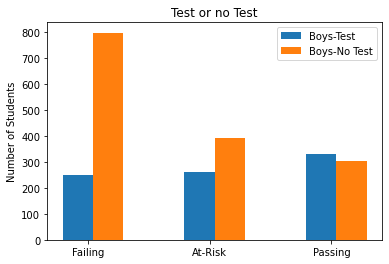

In [56]:
N = 3
boys_test = (boys_test_failing['test preparation course'], boys_test_at_risk['test preparation course'], boys_test_passing['test preparation course'])
boys_no_test = (boys_no_test_failing['test preparation course'], boys_no_test_at_risk['test preparation course'], boys_no_test_passing['test preparation course'])
girls_test = (girls_test_failing['test preparation course'], girls_test_at_risk['test preparation course'], girls_test_passing['test preparation course'])
girls_no_test = (girls_no_test_failing['test preparation course'], girls_no_test_at_risk['test preparation course'], girls_no_test_passing['test preparation course'])

ind = np.arange(N) 
width = 0.25       
plt.bar(ind, boys_test, width, label='Boys-Test')
plt.bar(ind + width, boys_no_test, width, label='Boys-No Test')

plt.ylabel('Number of Students')
plt.title('Test or no Test')

plt.xticks(ind + width / 3, ('Failing','At-Risk','Passing'))
plt.legend(loc='best')
plt.show()

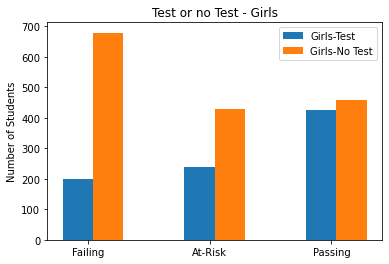

In [55]:
ind = np.arange(N) 
width = 0.25       
plt.bar(ind, girls_test, width, label='Girls-Test')
plt.bar(ind + width, girls_no_test, width, label='Girls-No Test')

plt.ylabel('Number of Students')
plt.title('Test or no Test - Girls')

plt.xticks(ind + width / 3, ('Failing','At-Risk','Passing'))
plt.legend(loc='best')
plt.show()

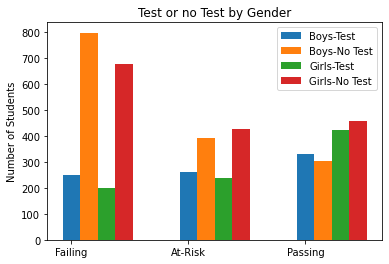

In [54]:
ind = np.arange(N) 
width = 0.15
r1 = np.arange(N)
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

plt.bar(r1, boys_test, width, label='Boys-Test')
plt.bar(r2, boys_no_test, width, label='Boys-No Test')
plt.bar(r3, girls_test, width, label='Girls-Test')
plt.bar(r4, girls_no_test, width, label='Girls-No Test')

plt.ylabel('Number of Students')
plt.title('Test or no Test by Gender')

plt.xticks(ind, ('Failing','At-Risk','Passing'))
plt.legend(loc='best')
plt.show()

In [106]:
boys_failing_comp_mean = boys_failing['composite score'].mean().round(decimals=2)
boys_at_risk_comp_mean = boys_at_risk['composite score'].mean().round(decimals=2)
boys_passing_comp_mean = boys_passing['composite score'].mean().round(decimals=2)
girls_failing_comp_mean = girls_failing['composite score'].mean().round(decimals=2)
girls_at_risk_comp_mean = girls_at_risk['composite score'].mean().round(decimals=2)
girls_passing_comp_mean = girls_passing['composite score'].mean().round(decimals=2)

boys_test_failing = boys_failing.loc[boys_failing['test preparation course'] == 'completed']
boys_test_at_risk = boys_at_risk.loc[boys_at_risk['test preparation course'] == 'completed'] 
boys_test_passing = boys_passing.loc[boys_passing['test preparation course'] == 'completed']
boys_no_test_failing = boys_failing.loc[boys_failing['test preparation course'] == 'none']
boys_no_test_at_risk = boys_at_risk.loc[boys_at_risk['test preparation course'] == 'none']
boys_no_test_passing = boys_passing.loc[boys_passing['test preparation course'] == 'none']
girls_test_failing = girls_failing.loc[girls_failing['test preparation course'] == 'completed']
girls_test_at_risk = girls_at_risk.loc[girls_at_risk['test preparation course'] == 'completed']
girls_test_passing = girls_passing.loc[girls_passing['test preparation course'] == 'completed']
girls_no_test_failing = girls_failing.loc[girls_failing['test preparation course'] == 'none']
girls_no_test_at_risk = girls_at_risk.loc[girls_at_risk['test preparation course'] == 'none']
girls_no_test_passing = girls_passing.loc[girls_passing['test preparation course'] == 'none']

boys_test_failing_comp_mean = boys_test_failing['composite score'].mean().round(decimals=2)
boys_test_at_risk_comp_mean = boys_test_at_risk['composite score'].mean().round(decimals=2)
boys_test_passing_comp_mean = boys_test_passing['composite score'].mean().round(decimals=2)
boys_no_test_failing_comp_mean = boys_no_test_failing['composite score'].mean().round(decimals=2)
boys_no_test_at_risk_comp_mean = boys_no_test_at_risk['composite score'].mean().round(decimals=2)
boys_no_test_passing_comp_mean = boys_no_test_passing['composite score'].mean().round(decimals=2)
girls_test_failing_comp_mean = girls_test_failing['composite score'].mean().round(decimals=2)
girls_test_at_risk_comp_mean = girls_test_at_risk['composite score'].mean().round(decimals=2)
girls_test_passing_comp_mean = girls_test_passing['composite score'].mean().round(decimals=2)
girls_no_test_failing_comp_mean = girls_no_test_failing['composite score'].mean().round(decimals=2)
girls_no_test_at_risk_comp_mean = girls_no_test_at_risk['composite score'].mean().round(decimals=2)
girls_no_test_passing_comp_mean = girls_no_test_passing['composite score'].mean().round(decimals=2)

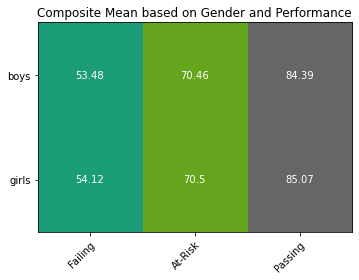

In [105]:
from matplotlib import colors
gender = ['boys', 'girls']
perf = ['Failing', 'At-Risk', 'Passing']
perf_data = np.array([[boys_failing_comp_mean, boys_at_risk_comp_mean, boys_passing_comp_mean], [girls_failing_comp_mean, girls_at_risk_comp_mean, girls_passing_comp_mean]])
fig, ax = plt.subplots()
im = ax.imshow(perf_data, cmap='Dark2')

ax.set_xticks(np.arange(len(perf)))
ax.set_yticks(np.arange(len(gender)))
ax.set_xticklabels(perf)
ax.set_yticklabels(gender)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(gender)):
    for j in range(len(perf)):
        text = ax.text(j, i, perf_data[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Composite Mean based on Gender and Performance")
fig.tight_layout()
plt.show()

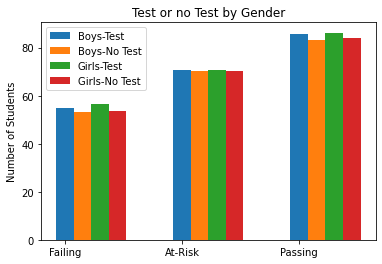

In [107]:
boys_test_comp_mean = (boys_test_failing_comp_mean, boys_test_at_risk_comp_mean, boys_test_passing_comp_mean)
boys_no_test_comp_mean = (boys_no_test_failing_comp_mean, boys_no_test_at_risk_comp_mean, boys_no_test_passing_comp_mean)
girls_test_comp_mean = (girls_test_failing_comp_mean, girls_test_at_risk_comp_mean, girls_test_passing_comp_mean)
girls_no_test_comp_mean = (girls_no_test_failing_comp_mean, girls_no_test_at_risk_comp_mean, girls_no_test_passing_comp_mean)

ind = np.arange(N) 
width = 0.15
r1 = np.arange(N)
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

plt.bar(r1, boys_test_comp_mean, width, label='Boys-Test')
plt.bar(r2, boys_no_test_comp_mean, width, label='Boys-No Test')
plt.bar(r3, girls_test_comp_mean, width, label='Girls-Test')
plt.bar(r4, girls_no_test_comp_mean, width, label='Girls-No Test')

plt.ylabel('Number of Students')
plt.title('Test or no Test by Gender')

plt.xticks(ind, ('Failing','At-Risk','Passing'))
plt.legend(loc='best')
plt.show()

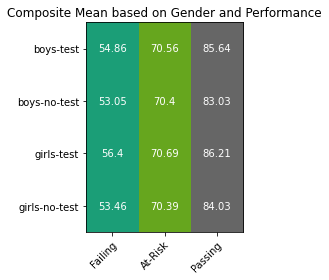

In [108]:
from matplotlib import colors
gender = ['boys-test', 'boys-no-test', 'girls-test', 'girls-no-test']
perf = ['Failing', 'At-Risk', 'Passing']
perf_data = np.array([[boys_test_failing_comp_mean, boys_test_at_risk_comp_mean, boys_test_passing_comp_mean], 
                      [boys_no_test_failing_comp_mean, boys_no_test_at_risk_comp_mean, boys_no_test_passing_comp_mean],
                      [girls_test_failing_comp_mean, girls_test_at_risk_comp_mean, girls_test_passing_comp_mean],
                      [girls_no_test_failing_comp_mean, girls_no_test_at_risk_comp_mean, girls_no_test_passing_comp_mean]])
fig, ax = plt.subplots()
im = ax.imshow(perf_data, cmap='Dark2')

ax.set_xticks(np.arange(len(perf)))
ax.set_yticks(np.arange(len(gender)))
ax.set_xticklabels(perf)
ax.set_yticklabels(gender)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(gender)):
    for j in range(len(perf)):
        text = ax.text(j, i, perf_data[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Composite Mean based on Gender and Performance")
fig.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Students in each category')

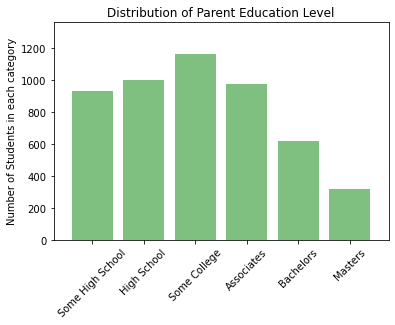

In [126]:
p_shs_count = stu_data.loc[stu_data['parental level of education'] == 'some high school'].count()
p_hs_count = stu_data.loc[stu_data['parental level of education'] == 'high school'].count()
p_sc_count = stu_data.loc[stu_data['parental level of education'] == 'some college'].count()
p_a_count = stu_data.loc[stu_data['parental level of education'] == "associate's degree"].count()
p_b_count = stu_data.loc[stu_data['parental level of education'] == "bachelor's degree"].count()
p_m_count = stu_data.loc[stu_data['parental level of education'] == "master's degree"].count()


labels = ['Some High School','High School','Some College', 'Associates', 'Bachelors', 'Masters']
p_ed_count = [p_shs_count['gender'], p_hs_count['gender'], p_sc_count['gender'], p_a_count['gender'], p_b_count['gender'], p_m_count['gender']]

x_axis = np.arange(len(p_ed_count))
plt.bar(x_axis, p_ed_count, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(p_ed_count)+200)
plt.title("Distribution of Parent Education Level")
plt.ylabel("Number of Students in each category")


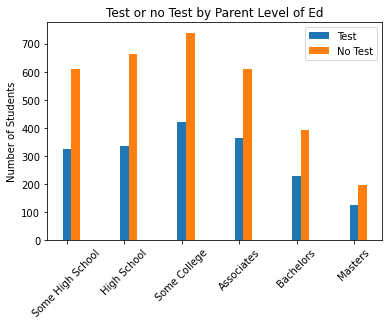

In [142]:
N=6

p_shs_test = p_shs.loc[p_shs['test preparation course'] == 'completed'].count()
p_hs_test = p_hs.loc[p_hs['test preparation course'] == 'completed'].count()
p_sc_test = p_sc.loc[p_sc['test preparation course'] == 'completed'].count()
p_a_test = p_a.loc[p_a['test preparation course'] == 'completed'].count()
p_b_test = p_b.loc[p_b['test preparation course'] == 'completed'].count()
p_m_test = p_m.loc[p_m['test preparation course'] == 'completed'].count()

p_shs_no_test = p_shs.loc[p_shs['test preparation course'] == 'none'].count()
p_hs_no_test = p_hs.loc[p_hs['test preparation course'] == 'none'].count()
p_sc_no_test = p_sc.loc[p_sc['test preparation course'] == 'none'].count()
p_a_no_test = p_a.loc[p_a['test preparation course'] == 'none'].count()
p_b_no_test = p_b.loc[p_b['test preparation course'] == 'none'].count()
p_m_no_test = p_m.loc[p_m['test preparation course'] == 'none'].count()

p_ed_test = (p_shs_test['test preparation course'],p_hs_test['test preparation course'], p_sc_test['test preparation course'], p_a_test['test preparation course'], p_b_test['test preparation course'], p_m_test['test preparation course'])
p_ed_no_test = (p_shs_no_test['test preparation course'], p_hs_no_test['test preparation course'], p_sc_no_test['test preparation course'], p_a_no_test['test preparation course'], p_b_no_test['test preparation course'], p_m_no_test['test preparation course'])

ind = np.arange(N) 
width = 0.15
r1 = np.arange(N)
r2 = [x + width for x in r1]

plt.bar(r1, p_ed_test, width, label='Test')
plt.bar(r2, p_ed_no_test, width, label='No Test')

plt.ylabel('Number of Students')
plt.title('Test or no Test by Parent Level of Ed')

plt.xticks(ind, ('Some High School','High School','Some College', 'Associates', 'Bachelors', 'Masters'), rotation=45)
plt.legend(loc='best')
plt.show()

In [178]:
# p_shs = stu_data.loc[stu_data['parental level of education'] == 'some high school']
# p_hs = stu_data.loc[stu_data['parental level of education'] == 'high school']
# p_sc = stu_data.loc[stu_data['parental level of education'] == 'some college']
# p_a = stu_data.loc[stu_data['parental level of education'] == "associate's degree"]
# p_b = stu_data.loc[stu_data['parental level of education'] == "bachelor's degree"]
# p_m = stu_data.loc[stu_data['parental level of education'] == "master's degree"]

p_shs_failing = p_shs.loc[p_shs['composite score'] < 65]
p_shs_at_risk = p_shs.loc[(p_shs['composite score'] > 65) & (p_shs['composite score'] < 76)]
p_shs_passing = p_shs.loc[p_shs['composite score'] > 76]

p_hs_failing = p_hs.loc[p_hs['composite score'] < 65]
p_hs_at_risk = p_hs.loc[(p_hs['composite score'] > 65) & (p_hs['composite score'] < 76)]
p_hs_passing = p_hs.loc[p_hs['composite score'] > 76]

p_sc_failing = p_sc.loc[p_sc['composite score'] < 65]
p_sc_at_risk = p_sc.loc[(p_sc['composite score'] > 65) & (p_sc['composite score'] < 76)]
p_sc_passing = p_sc.loc[p_sc['composite score'] > 76]

p_a_failing = p_a.loc[p_a['composite score'] < 65]
p_a_at_risk = p_a.loc[(p_a['composite score'] > 65) & (p_a['composite score'] < 76)]
p_a_passing = p_a.loc[p_a['composite score'] > 76]

p_b_failing = p_b.loc[p_b['composite score'] < 65]
p_b_at_risk = p_b.loc[(p_b['composite score'] > 65) & (p_b['composite score'] < 76)]
p_b_passing = p_b.loc[p_b['composite score'] > 76]
                      
p_m_failing = p_m.loc[p_m['composite score'] < 65]
p_m_at_risk = p_m.loc[(p_m['composite score'] > 65) & (p_m['composite score'] < 76)]
p_m_passing = p_m.loc[p_m['composite score'] > 76]

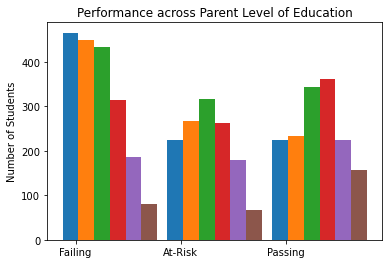

In [180]:
N = 3
p_shs_perf = (p_shs_failing['test preparation course'].count(), p_shs_at_risk['test preparation course'].count(), p_shs_at_risk['test preparation course'].count())
p_hs_perf = (p_hs_failing['test preparation course'].count(), p_hs_at_risk['test preparation course'].count(), p_hs_passing['test preparation course'].count())
p_sc_perf = (p_sc_failing['test preparation course'].count(), p_sc_at_risk['test preparation course'].count(), p_sc_passing['test preparation course'].count())
p_a_perf = (p_a_failing['test preparation course'].count(), p_a_at_risk['test preparation course'].count(), p_a_passing['test preparation course'].count())
p_b_perf = (p_b_failing['test preparation course'].count(), p_b_at_risk['test preparation course'].count(), p_b_passing['test preparation course'].count())
p_m_perf = (p_m_failing['test preparation course'].count(), p_m_at_risk['test preparation course'].count(), p_m_passing['test preparation course'].count())

ind = np.arange(N) 
width = 0.15
r1 = np.arange(N)
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]

plt.bar(r1, p_shs_perf, width, label='Some High School')
plt.bar(r2, p_hs_perf, width, label='High School')
plt.bar(r3, p_sc_perf, width, label='Some College')
plt.bar(r4, p_a_perf, width, label='Associates')
plt.bar(r5, p_b_perf, width, label='Bachelors')
plt.bar(r6, p_m_perf, width, label='Masters')

plt.ylabel('Number of Students')
plt.title('Performance across Parent Level of Education')

plt.xticks(ind + width / 3, ('Failing','At-Risk','Passing'))
# plt.legend(loc='best')
plt.show()



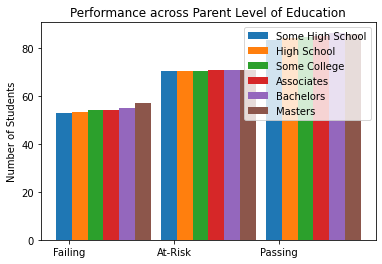

In [182]:
N = 3
p_shs_failing_comp_mean = p_shs_failing['composite score'].mean().round(decimals=2)
p_shs_at_risk_comp_mean = p_shs_at_risk['composite score'].mean().round(decimals=2)
p_shs_passing_comp_mean = p_shs_passing['composite score'].mean().round(decimals=2)
p_hs_failing_comp_mean = p_hs_failing['composite score'].mean().round(decimals=2)
p_hs_at_risk_comp_mean = p_hs_at_risk['composite score'].mean().round(decimals=2)
p_hs_passing_comp_mean = p_hs_passing['composite score'].mean().round(decimals=2)
p_sc_failing_comp_mean = p_sc_failing['composite score'].mean().round(decimals=2)
p_sc_at_risk_comp_mean = p_sc_at_risk['composite score'].mean().round(decimals=2)
p_sc_passing_comp_mean = p_sc_passing['composite score'].mean().round(decimals=2)
p_a_failing_comp_mean = p_a_failing['composite score'].mean().round(decimals=2)
p_a_at_risk_comp_mean = p_a_at_risk['composite score'].mean().round(decimals=2)
p_a_passing_comp_mean = p_a_passing['composite score'].mean().round(decimals=2)
p_b_failing_comp_mean = p_b_failing['composite score'].mean().round(decimals=2)
p_b_at_risk_comp_mean = p_b_at_risk['composite score'].mean().round(decimals=2)
p_b_passing_comp_mean = p_b_passing['composite score'].mean().round(decimals=2)
p_m_failing_comp_mean = p_m_failing['composite score'].mean().round(decimals=2)
p_m_at_risk_comp_mean = p_m_at_risk['composite score'].mean().round(decimals=2)
p_m_passing_comp_mean = p_m_passing['composite score'].mean().round(decimals=2)

p_shs_comp_mean = (p_shs_failing_comp_mean, p_shs_at_risk_comp_mean, p_shs_passing_comp_mean)
p_hs_comp_mean = (p_hs_failing_comp_mean, p_hs_at_risk_comp_mean, p_hs_passing_comp_mean)
p_sc_comp_mean = (p_sc_failing_comp_mean, p_sc_at_risk_comp_mean, p_sc_passing_comp_mean)
p_a_comp_mean = (p_a_failing_comp_mean, p_a_at_risk_comp_mean, p_a_passing_comp_mean)
p_b_comp_mean = (p_b_failing_comp_mean, p_b_at_risk_comp_mean, p_b_passing_comp_mean)
p_m_comp_mean = (p_m_failing_comp_mean, p_m_at_risk_comp_mean, p_m_passing_comp_mean)


# boys_test_failing_comp_mean = boys_test_failing['composite score'].mean().round(decimals=2)
# boys_test_at_risk_comp_mean = boys_test_at_risk['composite score'].mean().round(decimals=2)
# boys_test_passing_comp_mean = boys_test_passing['composite score'].mean().round(decimals=2)

# p_shs = stu_data.loc[stu_data['parental level of education'] == 'some high school']
# p_hs = stu_data.loc[stu_data['parental level of education'] == 'high school']
# p_sc = stu_data.loc[stu_data['parental level of education'] == 'some college']
# p_a = stu_data.loc[stu_data['parental level of education'] == "associate's degree"]
# p_b = stu_data.loc[stu_data['parental level of education'] == "bachelor's degree"]
# p_m = stu_data.loc[stu_data['parental level of education'] == "master's degree"]

ind = np.arange(N) 
width = 0.15
r1 = np.arange(N)
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]

plt.bar(r1, p_shs_comp_mean, width, label='Some High School')
plt.bar(r2, p_hs_comp_mean, width, label='High School')
plt.bar(r3, p_sc_comp_mean, width, label='Some College')
plt.bar(r4, p_a_comp_mean, width, label='Associates')
plt.bar(r5, p_b_comp_mean, width, label='Bachelors')
plt.bar(r6, p_m_comp_mean, width, label='Masters')

plt.ylabel('Number of Students')
plt.title('Performance across Parent Level of Education')

plt.xticks(ind + width / 3, ('Failing','At-Risk','Passing'))
plt.legend(loc='best')
plt.show()

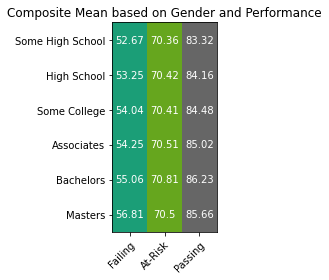

In [184]:
l_ed = ['Some High School','High School','Some College', 'Associates', 'Bachelors', 'Masters']
perf = ['Failing', 'At-Risk', 'Passing']
perf_data = np.array([[p_shs_failing_comp_mean, p_shs_at_risk_comp_mean, p_shs_passing_comp_mean], 
                      [p_hs_failing_comp_mean, p_hs_at_risk_comp_mean, p_hs_passing_comp_mean],
                      [p_sc_failing_comp_mean, p_sc_at_risk_comp_mean, p_sc_passing_comp_mean],
                      [p_a_failing_comp_mean, p_a_at_risk_comp_mean, p_a_passing_comp_mean],
                      [p_b_failing_comp_mean, p_b_at_risk_comp_mean, p_b_passing_comp_mean],
                      [p_m_failing_comp_mean, p_m_at_risk_comp_mean, p_m_passing_comp_mean]])

fig, ax = plt.subplots()
im = ax.imshow(perf_data, cmap='Dark2')

ax.set_xticks(np.arange(len(perf)))
ax.set_yticks(np.arange(len(l_ed)))
ax.set_xticklabels(perf)
ax.set_yticklabels(l_ed)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(l_ed)):
    for j in range(len(perf)):
        text = ax.text(j, i, perf_data[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Composite Mean based on Gender and Performance")
fig.tight_layout()
plt.show()